## 자동차 리콜 3개년 분석

## 데이터 출처
-  https://www.data.go.kr/data/3048950/fileData.do

[받은 파일]
- 2020년:자동차리콜현황(2020) v3.0.csv
- 2021년:자동차리콜현황(2021).csv
- 2022년:한국교통안전공단_자동차결함 리콜현황_20221231.csv

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#데이터 로드
df1 = pd.read_csv('./data/recall_2022.csv', encoding='cp949')
df2 = pd.read_csv('./data/recall_2021.csv', encoding='cp949')
df3 = pd.read_csv('./data/recall_2020.csv', encoding='cp949')


In [5]:
# 데이터 병합

import os
folders = os.listdir(r'C:\DATA_learning\1일차\0.데이터분석복습\1.자동차리콜데이터분석\data')
os.chdir(r'C:\DATA_learning\1일차\0.데이터분석복습\1.자동차리콜데이터분석\data')

df = pd.DataFrame()
for files in folders:
    dfre = pd.read_csv(files, encoding='cp949')
    df = pd.concat([df, dfre])

df

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
0,(주)에프엠케이,기블리 디젤,2014-05-28,2016-03-15,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
1,(주)에프엠케이,콰트로포르테 디젤,2014-05-08,2016-03-14,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
2,한국토요타자동차(주),토요타 프리우스,2019-07-11,2019-07-31,2020-01-23,"콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품..."
3,한국토요타자동차(주),토요타 캠리,2019-08-23,2019-09-06,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부..."
4,한국토요타자동차(주),토요타 캠리 하이브리드,2019-08-21,2019-09-04,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부..."
...,...,...,...,...,...,...
1414,비엠더블유코리아(주),BMW i4 M50,2021-11-22,2022-10-24,2022-12-26,배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...
1415,비엠더블유코리아(주),BMW i4 eDrive40,2021-11-23,2022-10-24,2022-12-26,배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...
1416,(주)스포츠모터사이클코리아,1290 SUPER DUKE R,2020-02-11,2022-04-29,2022-12-27,메인 와이어링 하네스와 차체 구성 부품 간의 간섭으로 인한 피복 손상으로 배선 단선...
1417,화창상사(주),SPRINGFIELD,2019-10-28,2020-06-03,2022-12-27,차량제어모듈(VEHICLE CONTROL MODULE) 및 커넥터 접촉 불량(헐거움...


In [18]:
# 데이터 중복 여부 및 개수 확인

print(df.duplicated())
print(df.duplicated().sum())


0       False
1       False
2       False
3       False
4       False
        ...  
1414    False
1415    False
1416    False
1417    False
1418    False
Length: 4656, dtype: bool
158


In [22]:
# 데이터 중복 처리(삭제)

df.drop_duplicates(inplace=True)
print(df)


                 제작자                 차명    생산기간(부터)    생산기간(까지)       리콜개시일  \
0           (주)에프엠케이             기블리 디젤  2014-05-28  2016-03-15  2020-03-23   
1           (주)에프엠케이          콰트로포르테 디젤  2014-05-08  2016-03-14  2020-03-23   
2        한국토요타자동차(주)           토요타 프리우스  2019-07-11  2019-07-31  2020-01-23   
3        한국토요타자동차(주)             토요타 캠리  2019-08-23  2019-09-06  2020-01-23   
4        한국토요타자동차(주)       토요타 캠리 하이브리드  2019-08-21  2019-09-04  2020-01-23   
...              ...                ...         ...         ...         ...   
1414     비엠더블유코리아(주)         BMW i4 M50  2021-11-22  2022-10-24  2022-12-26   
1415     비엠더블유코리아(주)    BMW i4 eDrive40  2021-11-23  2022-10-24  2022-12-26   
1416  (주)스포츠모터사이클코리아  1290 SUPER DUKE R  2020-02-11  2022-04-29  2022-12-27   
1417         화창상사(주)        SPRINGFIELD  2019-10-28  2020-06-03  2022-12-27   
1418         화창상사(주)      CHIEF VINTAGE  2019-08-02  2020-06-04  2022-12-27   

                                                   

## 1. 제조사별 리콜 현황
* 3년동안 리콜 건수가 가장 많은 제조사는?
* 시각화를 통해 근거 자료 만들기

In [111]:
# 3년 간 리콜 가장 많은 제조사
tmp = df.groupby('제작자').size().sort_values(ascending=False).to_frame('count')
tmp

,count
제작자,
비엠더블유코리아(주),1660
메르세데스벤츠코리아(주),1108
폭스바겐그룹코리아 주식회사,301
만트럭버스코리아(주),137
현대자동차(주),120
아우디폭스바겐코리아(주),115
한불모터스(주),102
(주)볼보자동차코리아,78
포드세일즈서비스코리아(유),76


In [112]:
print(f'3년 간 리콜을 가장 많이 한 제조사: {tmp.index[0]}')

3년 간 리콜을 가장 많이 한 제조사: 비엠더블유코리아(주)


In [31]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# font_path = './NanumGothic.ttf' # 폰트 위치
# plt.rc('font', family=font_name)

plt.rc('font', family='Malgun Gothic')
# plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 깨짐 현상 해결

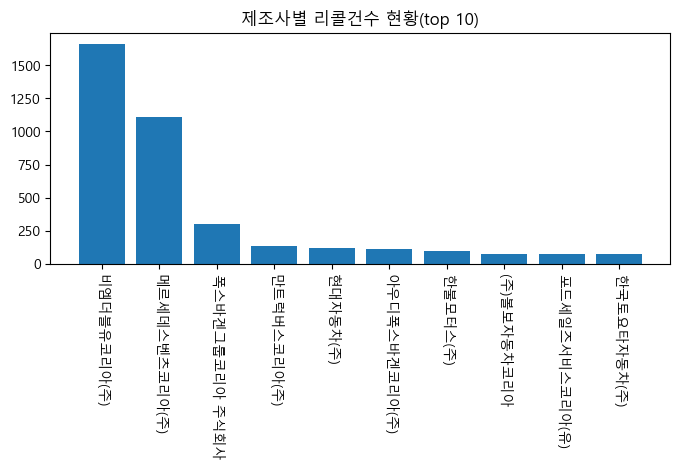

In [36]:
x = tmp.index[:10]
y = tmp['count'][:10]

plt.figure(figsize=(8,3)) # 스케치북
plt.bar(x=x,height=y)     # bar 차트에 x, y 값 할당
plt.xticks(rotation=270)  # x축 이름을 회전
plt.title('제조사별 리콜건수 현황(top 10)')
plt.show() # 출력

```
문제: 3년동안 리콜건수가 가장 많은 제조사는?
답: 비엠더블유코리아(주)

```

## 2.(그나마) 튼튼하게 만드는 기업 vs  Worst 기업 top10

* 출고 년도부터 리콜 개시일 사이의 기간을 사용기간이라고 할때, 
* 이 사용기간이 길면 길수록 그나마 튼튼하게 만들었다고 볼 수 있다. 
* 물론, 여기 리콜현황에 등록되지 않은 제조사가 베스트이겠지만....
* 사용기간의 평균이 가장 높고 낮은 10개 기업 리스트를 알아보자

In [119]:
# 사용기간 컬럼 새로 만들기(파생변수 생성해서)
# 사용기간 = 생산기간(까지) ~ 리콜개시일
# 사용기간이 길수록 튼튼

df['리콜개시일'] = pd.to_datetime(df['리콜개시일'])
df['생산기간(까지)'] = pd.to_datetime(df['생산기간(까지)'])
df['사용기간'] = (df['리콜개시일'] - df['생산기간(까지)'])
df


,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유,사용기간
0,(주)에프엠케이,기블리 디젤,2014-05-28,2016-03-15,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,1469 days
1,(주)에프엠케이,콰트로포르테 디젤,2014-05-08,2016-03-14,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,1470 days
2,한국토요타자동차(주),토요타 프리우스,2019-07-11,2019-07-31,2020-01-23,"콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품...",176 days
3,한국토요타자동차(주),토요타 캠리,2019-08-23,2019-09-06,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부...",139 days
4,한국토요타자동차(주),토요타 캠리 하이브리드,2019-08-21,2019-09-04,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부...",141 days
...,...,...,...,...,...,...,...
1414,비엠더블유코리아(주),BMW i4 M50,2021-11-22,2022-10-24,2022-12-26,배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...,63 days
1415,비엠더블유코리아(주),BMW i4 eDrive40,2021-11-23,2022-10-24,2022-12-26,배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...,63 days
1416,(주)스포츠모터사이클코리아,1290 SUPER DUKE R,2020-02-11,2022-04-29,2022-12-27,메인 와이어링 하네스와 차체 구성 부품 간의 간섭으로 인한 피복 손상으로 배선 단선...,242 days
1417,화창상사(주),SPRINGFIELD,2019-10-28,2020-06-03,2022-12-27,차량제어모듈(VEHICLE CONTROL MODULE) 및 커넥터 접촉 불량(헐거움...,937 days


In [124]:
# 제조사별 사용기간 평균
avg_used = df.groupby('제작자')['사용기간'].mean().sort_values(ascending=False).to_frame('사용기간')
avg_used['사용기간'] = avg_used['사용기간'].astype(str).str.split().str[0].astype(int) # 일자만 표기되게
avg_used



,사용기간
제작자,
한신특장,3349
한국닛산(주),2501
비엠더블유코리아(주),2023
아이씨피(주),1902
(주)다산중공업,1665
한국지엠주식회사,1626
(주)에프엠케이,1466
지엠아시아퍼시픽지역본부 주식회사,1247
진일엔지니어링 주식회사,1201


In [125]:
# 평균 사용기간 상위 10 기업
avg_used.head(10)

,사용기간
제작자,
한신특장,3349
한국닛산(주),2501
비엠더블유코리아(주),2023
아이씨피(주),1902
(주)다산중공업,1665
한국지엠주식회사,1626
(주)에프엠케이,1466
지엠아시아퍼시픽지역본부 주식회사,1247
진일엔지니어링 주식회사,1201


In [126]:
# 평균 사용기간 하위 10 기업
avg_used_rev = avg_used.tail(10).sort_values(by='사용기간', ascending=True)
avg_used_rev

,사용기간
제작자,
폴스타오토모티브코리아 유한회사,22
주식회사 케이에스티일렉트릭,113
명원아이앤씨(주),128
(유)기흥모터스,254
범한자동차 주식회사,261
(주) 바이크코리아,269
대전기계공업(주),328
볼보트럭코리아(주),332
(주)스포츠모터사이클코리아,348


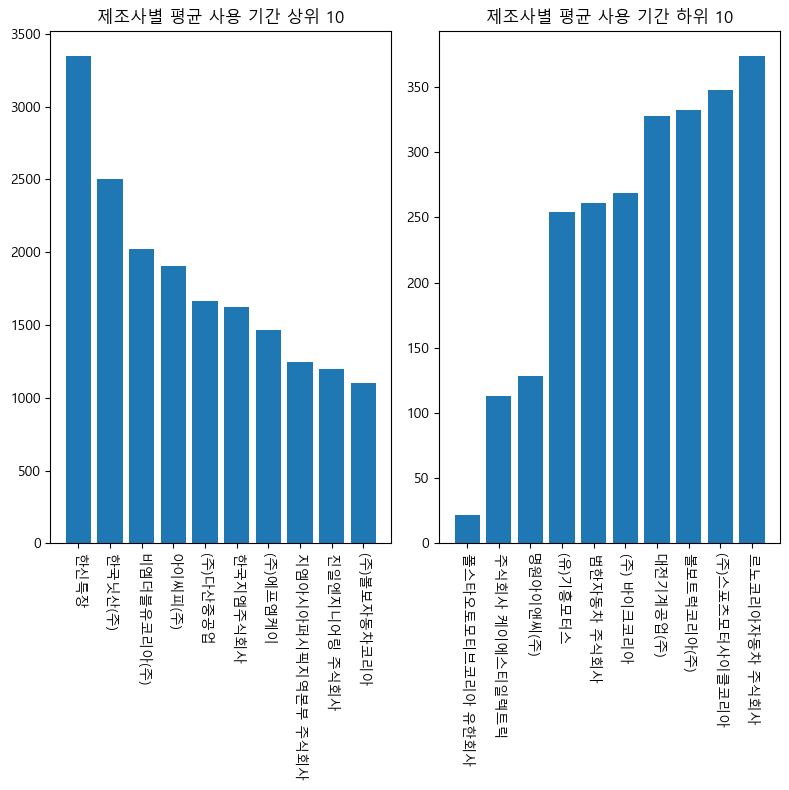

In [161]:
plt.figure(figsize=(8,8)) 

x1 = avg_used.index[:10]
y1 = avg_used['사용기간'][:10]
plt.subplot(1, 2, 1)
plt.bar(x=x1,height=y1)   
plt.xticks(rotation=270) 
plt.title('제조사별 평균 사용 기간 상위 10')


x2 = avg_used_rev.index[:10]
y2 = avg_used_rev['사용기간'][:10]
plt.subplot(1, 2, 2)
plt.bar(x=x2,height=y2)   
plt.xticks(rotation=270) 
plt.title('제조사별 평균 사용 기간 하위 10')


plt.tight_layout() 
plt.show() 

```
문제:그나마 튼튼 제조사 top 3는?
답: 한신특장, 한국닛산(주), 비엠더블유코리아(주)
```

## 3. 리콜이 가장 많은 제조사 1위의 리콜 원인은 ?
* 리콜 대마왕 XXX 기업의 문제의 모델 xxx에 대해 대규모 손해배상청구 소송을 진행하려 한다. 
* 이 회사의 주요 리콜 사유를 알아내고,(워드 클라우드로 제작해서 키워드 추출)
* 해당 사유로 리콜된 최고 문제 모델을 찾아내서
* 소송으로 가즈아~

In [162]:
# 리콜건수가 가장 많은 제조사는?
print(f'3년 간 리콜을 가장 많이 한 제조사: {tmp.index[0]}')

3년 간 리콜을 가장 많이 한 제조사: 비엠더블유코리아(주)


In [167]:
# 리콜 사유는?
df['리콜사유']


0       스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
1       스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
2       콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품...
3       뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부...
4       뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부...
                              ...                        
1414    배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...
1415    배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...
1416    메인 와이어링 하네스와 차체 구성 부품 간의 간섭으로 인한 피복 손상으로 배선 단선...
1417    차량제어모듈(VEHICLE CONTROL MODULE) 및 커넥터 접촉 불량(헐거움...
1418    차량제어모듈(VEHICLE CONTROL MODULE) 및 커넥터 접촉 불량(헐거움...
Name: 리콜사유, Length: 4498, dtype: object

In [186]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.sans-serif'] = ['NanumGothic']



findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.


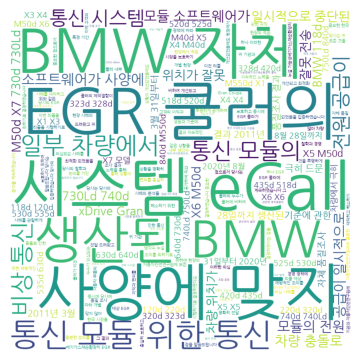

In [191]:
# 워드클라우드를 사용해 키워드 추출

from wordcloud import WordCloud, STOPWORDS
set(STOPWORDS)
spwords = set(['되었습니다','발견','되었습니다.',"수이기는","적은 수이기는","동안", "인하여", "있는", "경우", "있습니다", "가능성이", "않을", "차량의", "가", "에", "될", "이",
               "인해", "수", "중", "시", "또는", "있음", "의", "및", "있으며", "발생할", "이로", "오류로", "해당", "있어", "내에",
                "못", '으로", "의한', "위해", '후', '할', '로', '더', '와', '나', '전', '매우', '등', '내에', '을', '함'])

# caselist = result['리콜사유'].values
# text = ' '.join(caselist)
# len(text)

text = ''.join(df['리콜사유'].values)

font_path = './NanumGothic.ttf'
wc1 = WordCloud(max_font_size=200, stopwords=spwords,
                font_path=font_path,
                background_color='white', width=800, height=800)
wc1.generate(text)

plt.figure(figsize=(6, 4))
plt.imshow(wc1)
plt.tight_layout()
plt.axis('off')
plt.show()




In [217]:
# 주요 원인이 포함된 이유 상세 보기

world_sum = wc1.process_text(text) # 모든 속성을 하나의 텍스트로
most_common_word = max(world_sum, key=world_sum.get) # 최빈 단어

print(f'주요 리콜사유: {most_common_word}. ({world_sum[most_common_word]}번)')
# eCall : 사고 발생시 긴급 구조대에 차량 위치를 제공하는 비상 시스템

주요 리콜사유: 시스템 eCall. (558번)


In [224]:
#주요 원인으로 리콜된 가장 나쁜 모델3개는?

df_filter = df[df['리콜사유'].str.contains('eCall')] # eCall을 가진 행 필터링
car_filter = df_filter['차명'].value_counts() # 차종 별 eCall 찾기
car_filter.head(3)

차명
S 450 4MATIC      8
GLC 300 4MATIC    7
C 200             6
Name: count, dtype: int64

```
리콜 주요 원인은? "eCall"

그래서, 가장 나쁜 모델은? "S 450 4MATIC"

```